<a href="https://colab.research.google.com/github/patmadp16/Learning-R-Fundamental/blob/main/Learning_R_For_Data_ScienceB__Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library("ggplot2")
#install.packages("openxlsx")
library("openxlsx")

#read dataset xls
datamhs =read.xlsx("https://storage.googleapis.com/dqlab-dataset/mahasiswa.xlsx",sheet = "Sheet 1")

#menampilkan dataset
print(datamhs)

   ANGKATAN        Fakultas                          Prodi  Kode JUMLAH
1      2015          Bisnis                      Akuntansi  AKUN     88
2      2016          Bisnis                      Akuntansi  AKUN     85
3      2017          Bisnis                      Akuntansi  AKUN    103
4      2016 Seni dan Desain                        Arsitek    AR     28
5      2017 Seni dan Desain                        Arsitek    AR     45
6      2015 Seni dan Desain       Desain Komunikasi Visual   DKV    279
7      2016 Seni dan Desain       Desain Komunikasi Visual   DKV    314
8      2017 Seni dan Desain       Desain Komunikasi Visual   DKV    337
9      2015 Seni dan Desain              Film dan Televisi   FTV    284
10     2016 Seni dan Desain              Film dan Televisi   FTV    274
11     2017 Seni dan Desain              Film dan Televisi   FTV    300
12     2015 Ilmu Komunikasi                Ilmu Komunikasi ILKOM    499
13     2016 Ilmu Komunikasi                Ilmu Komunikasi ILKOM

In [2]:
#Menampilkan data per kolom
#print(datamhs["Fakultas"])

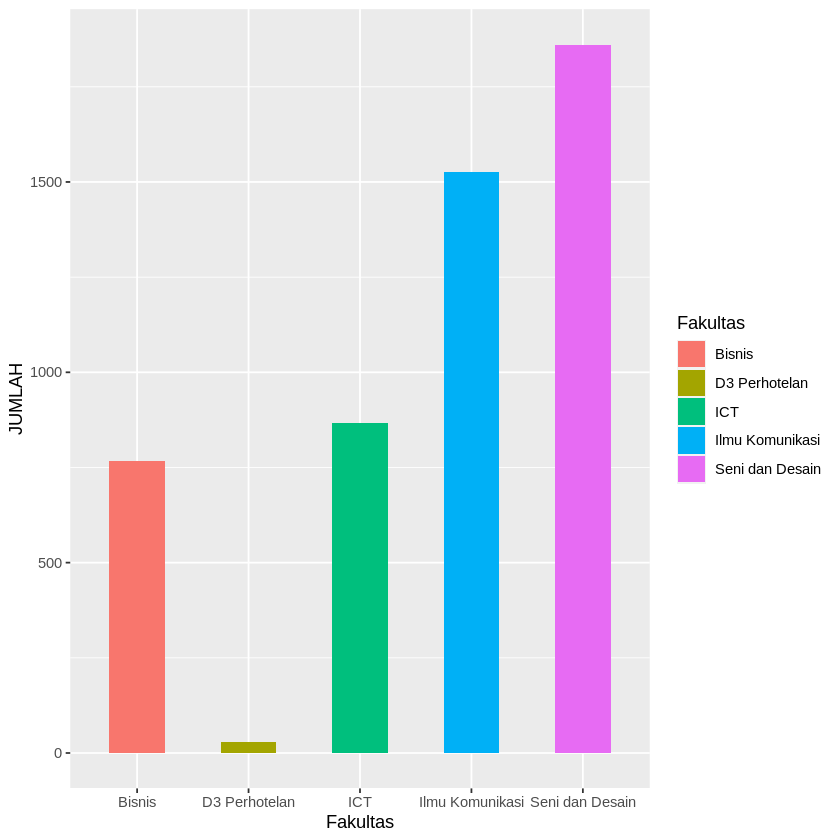

In [3]:
#Membuat grafik
grafikmhs <- ggplot(datamhs, aes(x=Fakultas, y=JUMLAH, fill=Fakultas))
grafikmhs <- grafikmhs + geom_bar(width = 0.5, stat="identity")
print(grafikmhs)

In [4]:
#Menghitung Jumlah Data by Fakultas lalu mengkategorikan berdasarkan fakultas dan tahun
summarybyfakultas <- aggregate(x = datamhs$JUMLAH, by=list(Kategori=datamhs$Fakultas, Tahun=datamhs$ANGKATAN), FUN=sum)
summarybyfakultas <- setNames(summarybyfakultas, c("fakultas","tahun","jumlah_mahasiswa"))
print(summarybyfakultas)


          fakultas tahun jumlah_mahasiswa
1           Bisnis  2015              257
2              ICT  2015              249
3  Ilmu Komunikasi  2015              500
4  Seni dan Desain  2015              563
5           Bisnis  2016              248
6              ICT  2016              294
7  Ilmu Komunikasi  2016              526
8  Seni dan Desain  2016              616
9           Bisnis  2017              263
10   D3 Perhotelan  2017               28
11             ICT  2017              324
12 Ilmu Komunikasi  2017              499
13 Seni dan Desain  2017              682


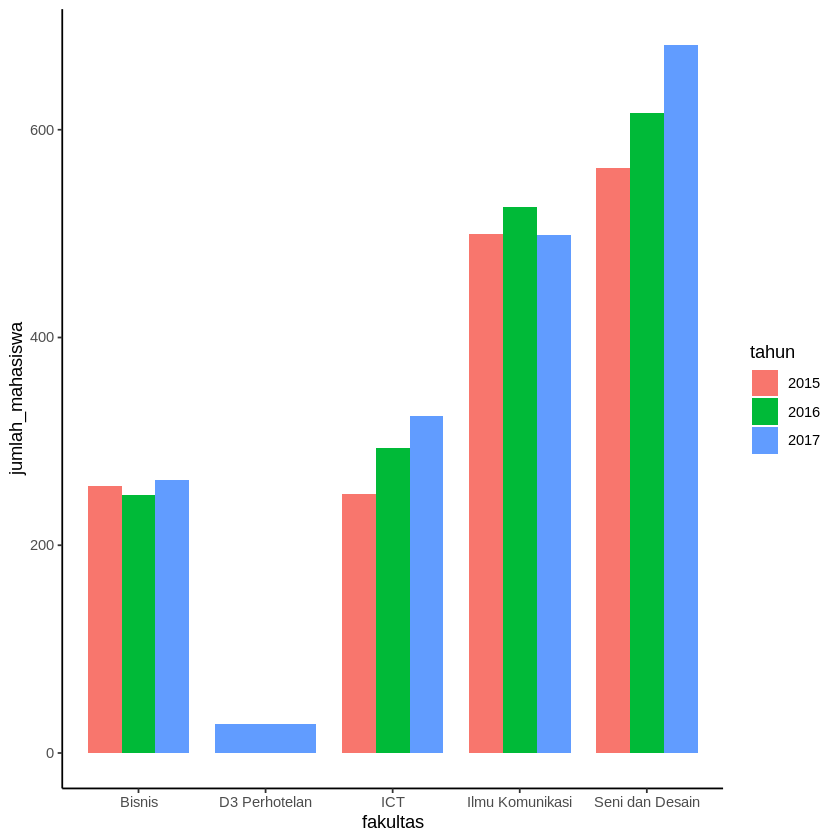

In [5]:
#Membuat diagram bar
summarybyfakultas$tahun = as.factor(summarybyfakultas$tahun)
grafik2 <- ggplot(summarybyfakultas, aes(x=fakultas, y=jumlah_mahasiswa)) + 
geom_bar(stat="identity", aes(fill=tahun), width = 0.8, position = position_dodge(width = 0.8)) + 
theme_classic()
print(grafik2)

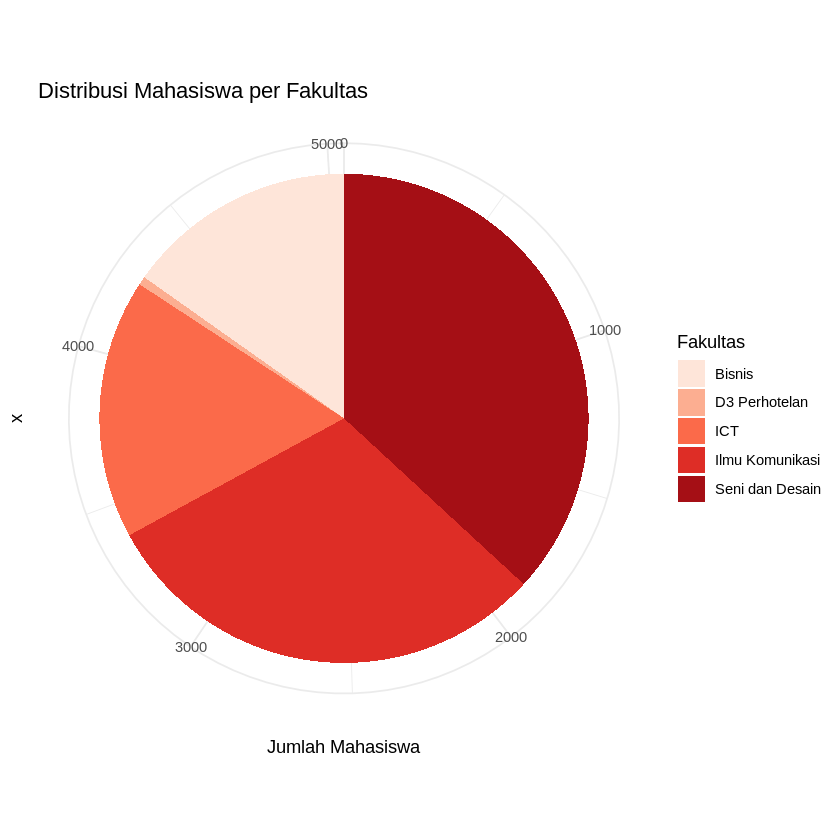

In [6]:
piechart <- ggplot(summarybyfakultas, aes(x="", y=jumlah_mahasiswa, fill=fakultas)) + geom_bar(width = 0.8, stat ="identity")
piechart <- piechart + coord_polar("y", start=0)
piechart <- piechart + ggtitle("Distribusi Mahasiswa per Fakultas")
piechart <- piechart + scale_fill_brewer(palette = "Reds") + theme_minimal()
piechart <- piechart + guides(fill = guide_legend(title="Fakultas"))
piechart <- piechart + ylab("Jumlah Mahasiswa") 
print(piechart)


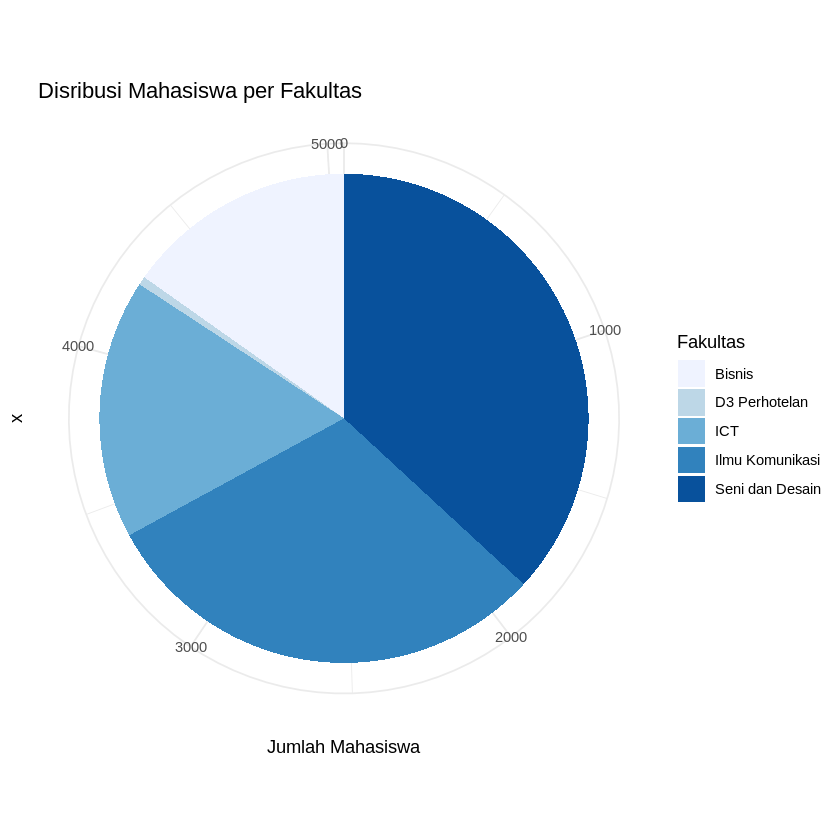

In [7]:
#Membuat grafik pie
piechart<- ggplot(summarybyfakultas, aes(x="", y=jumlah_mahasiswa, fill=fakultas))+ geom_bar(width = 1, stat = "identity")
piechart <- piechart + coord_polar("y", start=0)
piechart <- piechart + ggtitle("Disribusi Mahasiswa per Fakultas")
piechart <- piechart + scale_fill_brewer(palette="Blues")+ theme_minimal()
piechart <- piechart + guides(fill=guide_legend(title="Fakultas"))
piechart <- piechart + ylab("Jumlah Mahasiswa") 
piechart

,fakultas,tahun,jumlah_mahasiswa
,<chr>,<fct>,<dbl>
2,ICT,2015,249
3,Ilmu Komunikasi,2015,500
6,ICT,2016,294
7,Ilmu Komunikasi,2016,526
11,ICT,2017,324
12,Ilmu Komunikasi,2017,499


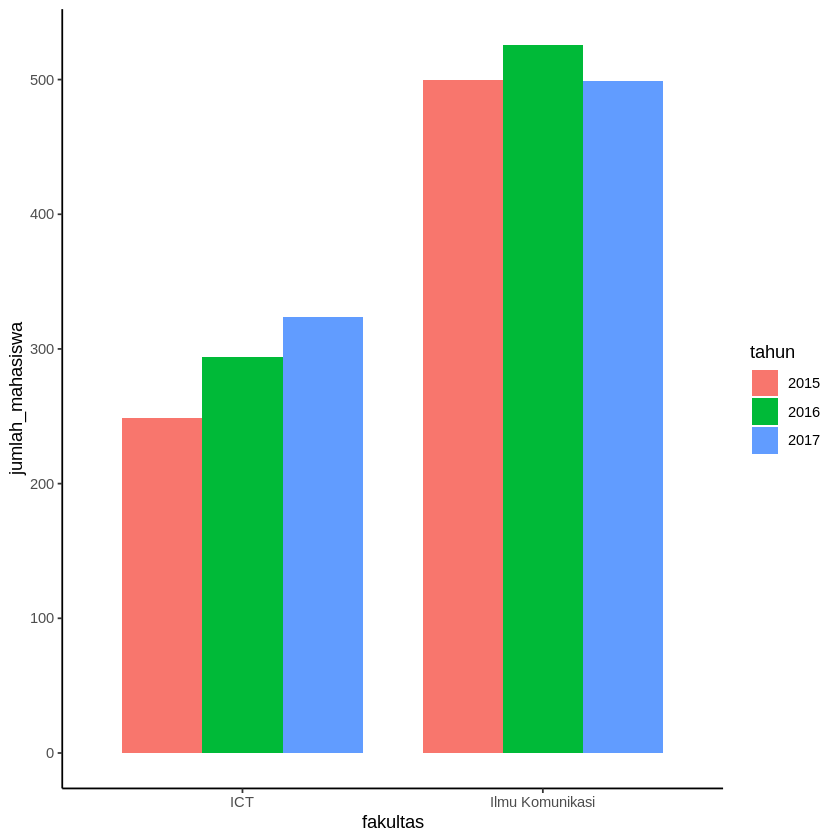

In [8]:
summarybyfakultas$tahun = as.factor(summarybyfakultas$tahun)
summarybyfakultas[summarybyfakultas$fakultas %in% c("ICT", "Ilmu Komunikasi"),]

grafik3 <- ggplot(summarybyfakultas[summarybyfakultas$fakultas %in% c("ICT", "Ilmu Komunikasi"),], aes(x=fakultas, y=jumlah_mahasiswa)) +
geom_bar(stat = "identity", aes(fill = tahun), width =0.8, position = position_dodge(width = 0.8)) + theme_classic()
print(grafik3)